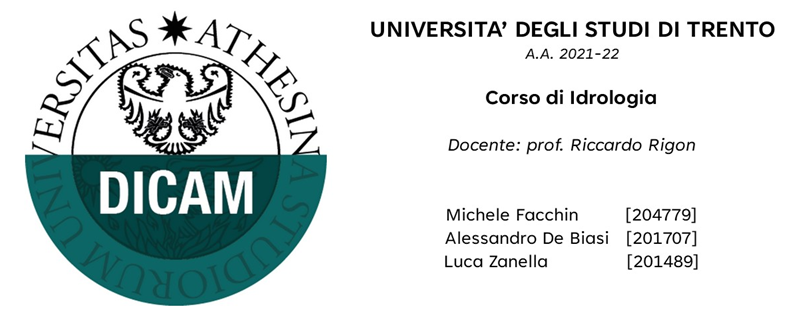

In [1]:
import os
from IPython.display import Image
whetgeo_project_path= os.path.dirname(os.getcwd())
Image(whetgeo_project_path+'\\Intestazione notebook.png')

# **Infiltrazione attraverso un terreno con tre strati e acqua superficiale**

### **Finalità** 

Analizzare l'infiltrazione attraverso un terreno composto da 3 strati (come in figura) sul quale è presente un accumulo costante di acqua di 0,05m.

Si ottengono e si rappresentano:

- Profilo verticale di SUZIONE
- Profilo verticale di CONTENUTO D'ACQUA
- Andamento nel tempo della SUZIONE a diverse profondità
- Andamento nel tempo del CONTENUTO D'ACQUA a diverse profondità
- Andamento nel tempo del FLUSSO D'ACQUA in superficie
- Andamento nel tempo del FLUSSO D'ACQUA sul fondo
- Andamento nel tempo del FLUSSO D'ACQUA cumulato in superficie
- Andamento nel tempo del FLUSSO D'ACQUA cumulato sul fondo

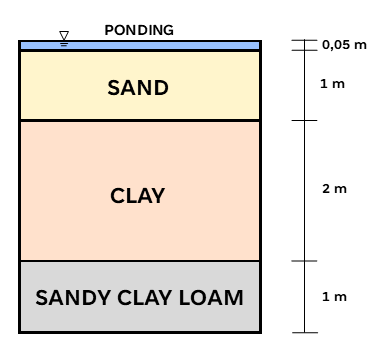

In [2]:
Image(whetgeo_project_path+'\\stratigrafia1.png')

### **Condizioni iniziali**

- Terreno saturo
- Distribuzione di pressione idrostatica


### **Condizioni al contorno**

- Fondo drenante
- Pressione d'acqua costante in superficie


### **Modello utilizzato**

Le proprietà idrauliche del terreno sono definite dal modello di Van Genuchten

In [7]:
import os
import pandas as pd

from geoframepy.whetgeo1d import grid_creator
from geoframepy.whetgeo1d import grid_to_netcdf

import warnings
warnings.filterwarnings('ignore')

project_path = os.path.dirname(os.getcwd())

In [4]:
grid_input_file_name = project_path + "/data/Grid_input/E1_grid.csv"

ic_input_file_name = project_path + "/data/Grid_input/E1_ic.csv"

parameter_input_file_name = project_path + "/data/Grid_input/Richards_VG.csv"

dictionary_input_file_name = project_path + "/data/Grid_input/dictionary.csv"

grid_type = 'classical'

dz_min = -9999

dz_max = -9999

b = -9999

psi_interp_model = "linear"

T_interp_model = "linear"



output_file_name =  project_path + "/data/Grid_NetCDF/E1_Output.nc"

output_title = '''Computational grid to solve the Richards' equation.
                  '''
output_summary = '''

Type,eta,K,equationStateID,parameterID
L,0.0,100,1,1
L,-1.0,100,1,11
L,-3.0,100,1,6
L,-4.0,0,nan,nan

eta,Psi0,T0
-0.0,-4.0,273.15
-4.0,0.0,273.15

'''

output_date = ''

output_institution = 'GEOframe'

### RUN

In [5]:
data_grid = pd.read_csv(grid_input_file_name)
print('Grid')
print(data_grid)
print()

data_ic = pd.read_csv(ic_input_file_name)
print('IC')
print(data_ic)
print()

data_parameter = pd.read_csv(parameter_input_file_name, comment='#')
print('Parameter')
print(data_parameter)
print()

data_dictionary = pd.read_csv(dictionary_input_file_name)

[KMAX, eta, eta_dual, space_delta, z, z_dual, control_volume] = grid_creator.grid1D(data_grid, dz_min, b, dz_max, grid_type, shallow_water=False)

[psi_0, T_0] = grid_creator.set_initial_condition(data_ic, eta, psi_interp_model, T_interp_model, shallow_water=False)

control_volume_index = grid_creator.calibration_point_index(data_grid, eta)

[equation_state_ID, parameter_ID, theta_s, theta_r, par_1, par_2, par_3, par_4,
par_5, alpha_ss, beta_ss, ks] = grid_creator.set_parameters_richards(data_grid, data_parameter, data_dictionary, KMAX, eta)

grid_to_netcdf.write_grid_netCDF_richards(eta, eta_dual, z, z_dual, space_delta, control_volume, control_volume_index, psi_0, T_0, equation_state_ID, parameter_ID, KMAX,
                   theta_s, theta_r, par_1, par_2, par_3, par_4, par_5, alpha_ss, beta_ss, ks,
                   output_file_name, output_title, output_institution, output_summary, output_date, grid_input_file_name, parameter_input_file_name)

Grid
  Type  eta    K  equationStateID  parameterID
0    L  0.0  100              0.0          1.0
1    L -1.0  100              0.0         11.0
2    L -3.0  100              0.0          6.0
3    L -4.0    0              NaN          NaN

IC
   eta  Psi0      T0
0 -0.0  -4.0  273.15
1 -4.0   0.0  273.15

Parameter
    thetaS  thetaR     n  alpha  alphaSpecificStorage  betaSpecificStorage  \
0     0.43   0.045  2.68   14.5          1.000000e-08         4.400000e-10   
1     0.41   0.057  2.28   12.4          1.000000e-08         4.400000e-10   
2     0.41   0.065  1.89    7.5          1.000000e-08         4.400000e-10   
3     0.45   0.067  1.41    2.0          1.000000e-08         4.400000e-10   
4     0.43   0.078  1.56    3.6          1.000000e-08         4.400000e-10   
5     0.39   0.100  1.48    5.9          1.000000e-08         4.400000e-10   
6     0.43   0.089  1.23    1.4          1.000000e-08         4.400000e-10   
7     0.41   0.095  1.31    1.9          1.000000e-08     

In [20]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.style as style 
import matplotlib.colors as cl
import matplotlib.dates as mdates
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        "text.usetex": True,
        "font.family": "serif",
        "axes.labelsize": 16,
        "font.size": 16,
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']

plt.rcParams.update(nice_fonts)

In [21]:
ds = xr.open_dataset(project_path + '/output/E1_Output_0000.nc')

In [22]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

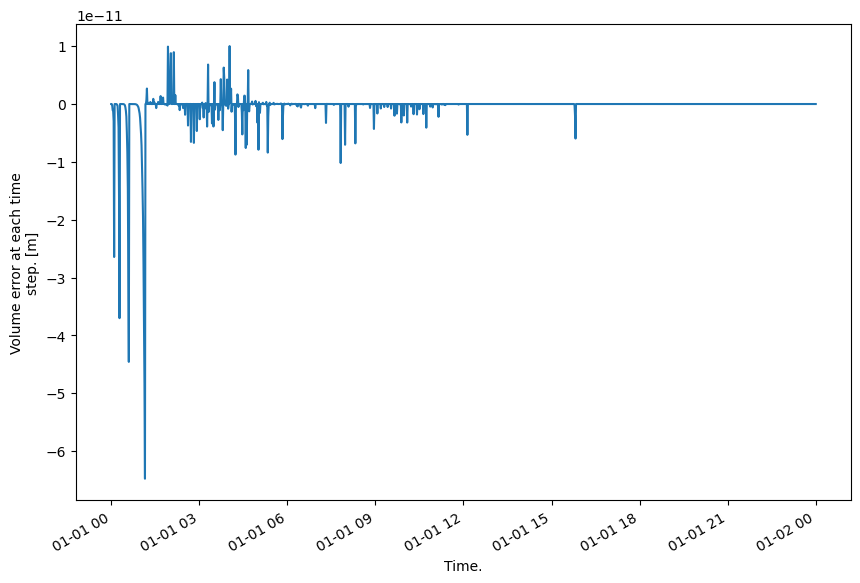

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10/1.618)) 
ds.error.plot(ax=ax)
plt.show()

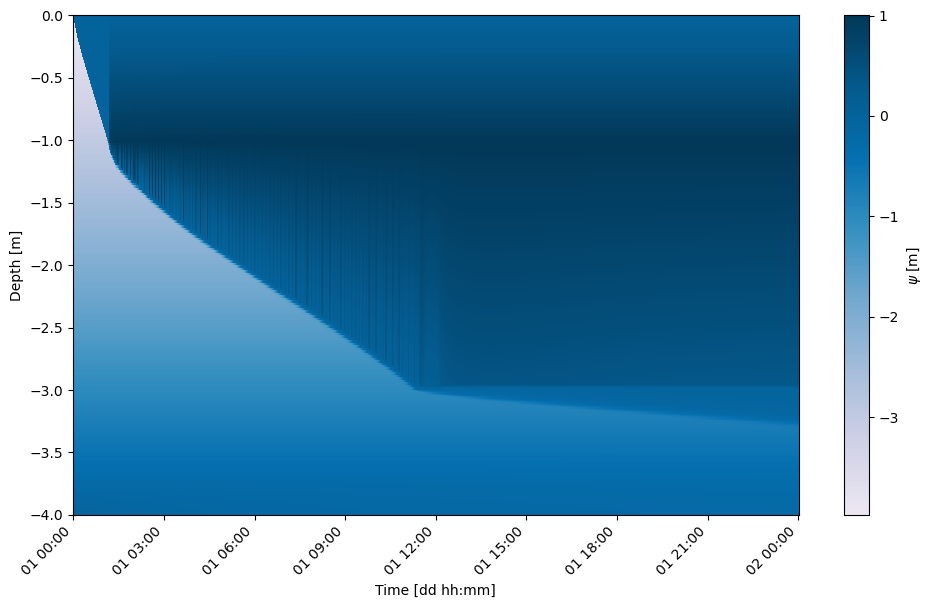

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.psi.values), vmax=np.amax(ds.psi.values))

a = ds.psi.plot(ax=ax, y='depth',add_colorbar=True, cmap=my_cmap, norm=norm, cbar_kwargs={'label': '$\psi$ [m]'})

ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time [dd hh:mm]')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()

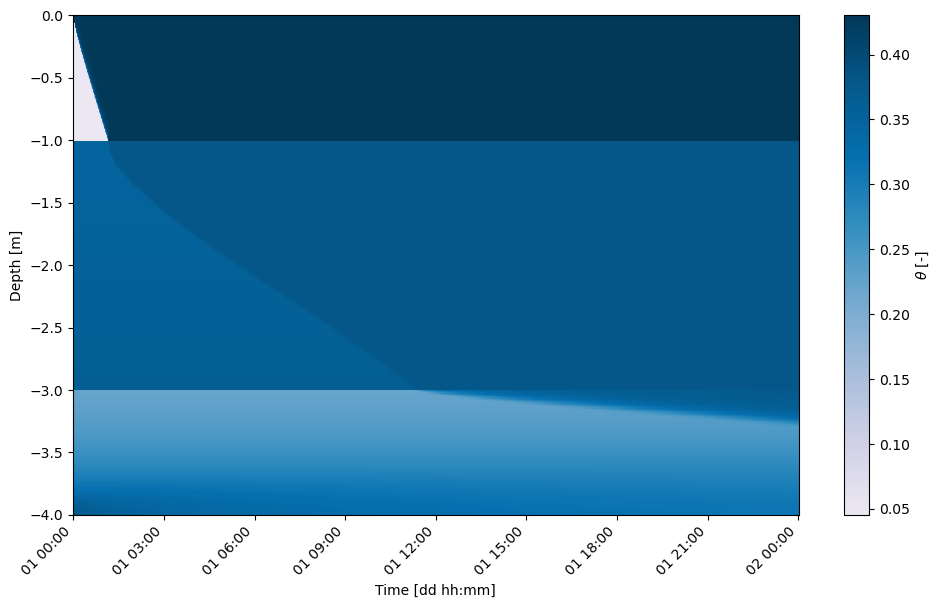

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.theta.values), vmax=np.amax(ds.theta.values))

a = ds.theta.plot(ax=ax, y='depth',add_colorbar=True, cmap=my_cmap, norm=norm, cbar_kwargs={'label': '$\\theta$ [-]'})

ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time [dd hh:mm]')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()

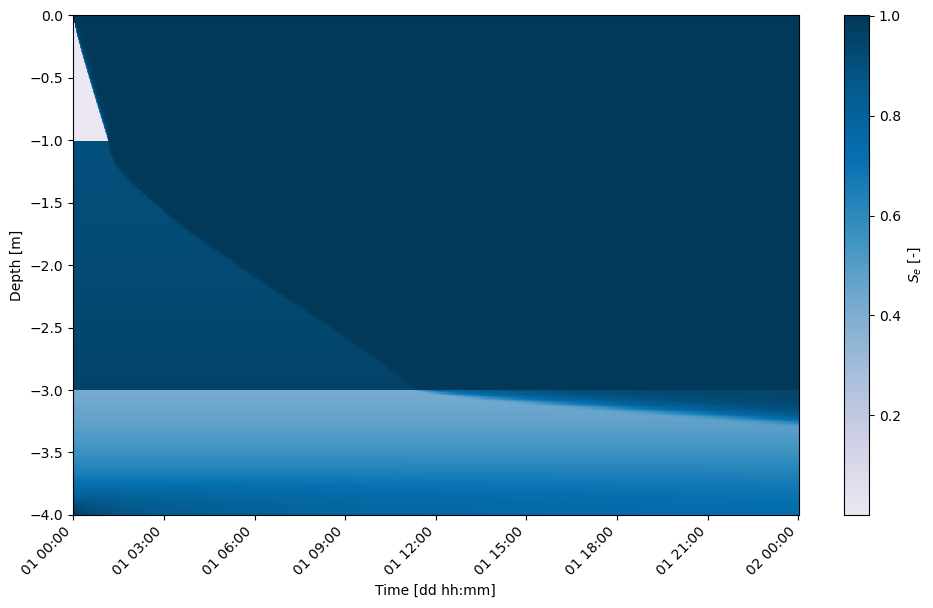

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(ds.saturationDegree.values), vmax=np.amax(ds.saturationDegree.values))

a = ds.saturationDegree.plot(ax=ax, y='depth',add_colorbar=True, cmap=my_cmap, norm=norm, cbar_kwargs={'label': '$S_e$ [-]'})

ax.set_ylabel('Depth [m]')
ax.set_xlabel('Time [dd hh:mm]')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()

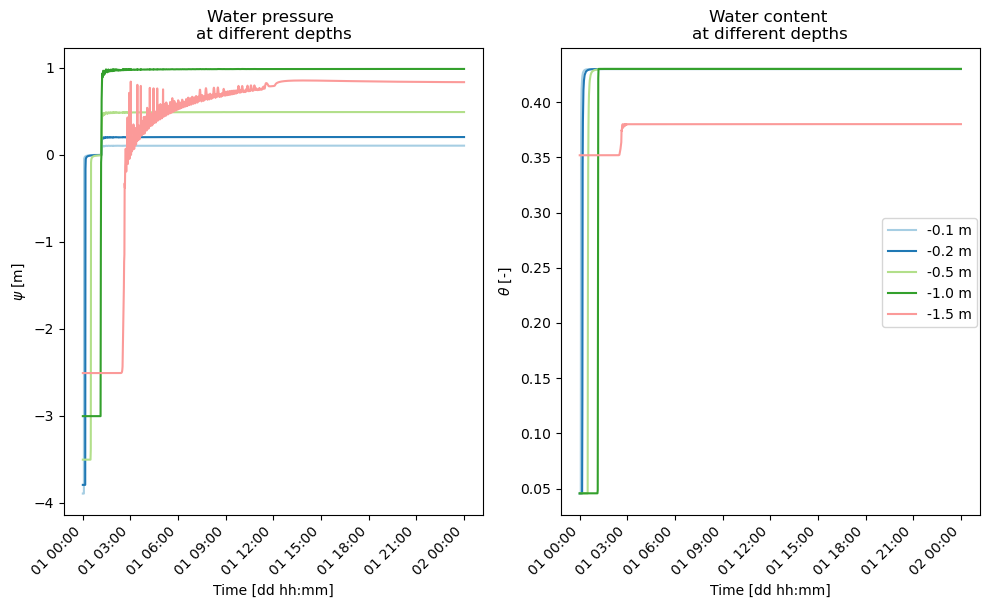

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10/1.618)) 

ds.psi.sel(depth=-0.1, method='nearest').plot(ax=ax1, color=colors[0])
ds.psi.sel(depth=-0.2, method='nearest').plot(ax=ax1, color=colors[1])
ds.psi.sel(depth=-0.5, method='nearest').plot(ax=ax1, color=colors[2])
ds.psi.sel(depth=-1.0, method='nearest').plot(ax=ax1, color=colors[3])
ds.psi.sel(depth=-1.5, method='nearest').plot(ax=ax1, color=colors[4])

ax1.set_title('Water pressure \nat different depths')


ax1.set_ylabel('$\psi$ [m]')
ax1.set_xlabel('Time [dd hh:mm]')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax1.xaxis.set_tick_params(rotation=45)

ds.theta.sel(depth=-0.1, method='nearest').plot(ax=ax2, label = '-0.1 m', color=colors[0])
ds.theta.sel(depth=-0.2, method='nearest').plot(ax=ax2, label = '-0.2 m', color=colors[1])
ds.theta.sel(depth=-0.5, method='nearest').plot(ax=ax2, label = '-0.5 m', color=colors[2])
ds.theta.sel(depth=-1.0, method='nearest').plot(ax=ax2, label = '-1.0 m', color=colors[3])
ds.theta.sel(depth=-1.5, method='nearest').plot(ax=ax2, label = '-1.5 m', color=colors[4])

ax2.set_title('Water content \nat different depths')


ax2.set_ylabel('$\\theta$ [-]')
ax2.set_xlabel('Time [dd hh:mm]')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax2.xaxis.set_tick_params(rotation=45)

ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

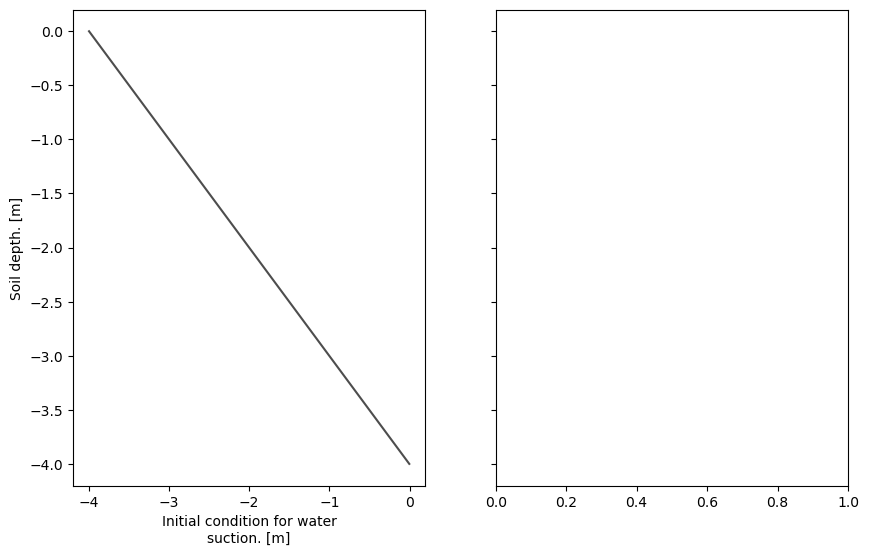

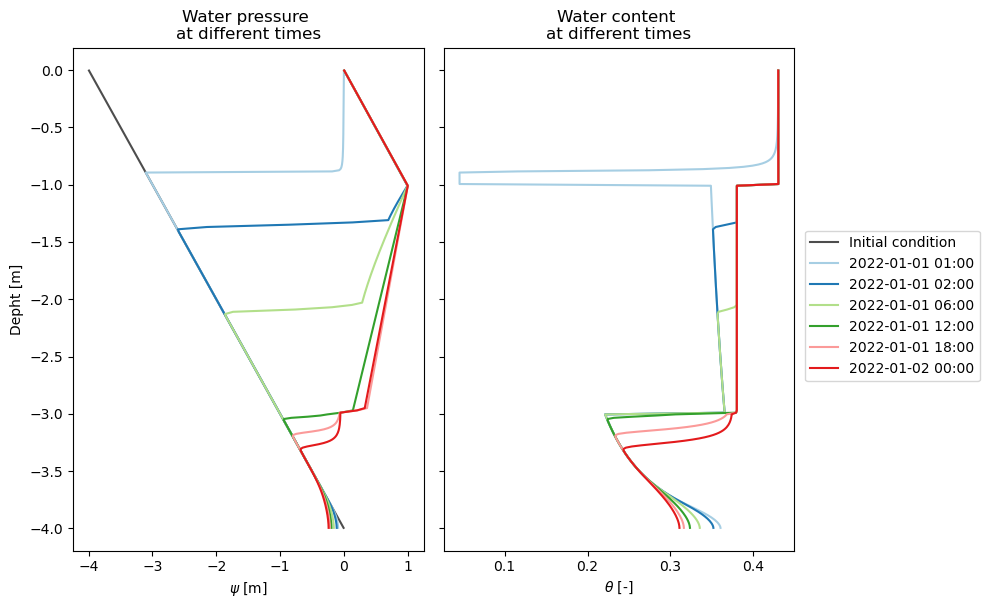

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(10, 10/1.618)) 

ds.psiIC.plot(ax=ax1, y='depth', label='Initial condition', color='0.3')
ds.psi.sel(time='2022-01-01 01:00').plot(ax=ax1, y='depth', label='2022-01-01 01:00', color=colors[0])
ds.psi.sel(time='2022-01-01 02:00').plot(ax=ax1, y='depth', label='2022-01-01 02:00', color=colors[1])
ds.psi.sel(time='2022-01-01 06:00').plot(ax=ax1, y='depth', label='2022-01-01 06:00', color=colors[2])
ds.psi.sel(time='2022-01-01 12:00').plot(ax=ax1, y='depth', label='2022-01-01 12:00', color=colors[3])
ds.psi.sel(time='2022-01-01 18:00').plot(ax=ax1, y='depth', label='2022-01-01 18:00', color=colors[4])
ds.psi.sel(time='2022-01-02 00:00').plot(ax=ax1, y='depth', label='2022-01-02 00:00', color=colors[5])

ax1.set_title('Water pressure \nat different times')

ax1.set_ylabel('Depht [m]')
ax1.set_xlabel('$\psi$ [m]')

# ds.psiIC.plot(y='depth', label='Initial condition', color='0.3')
plt.plot(np.nan, np.nan, label='Initial condition', color='0.3')
ds.theta.sel(time='2022-01-01 01:00').plot(ax=ax2, y='depth', label='2022-01-01 01:00', color=colors[0])
ds.theta.sel(time='2022-01-01 02:00').plot(ax=ax2, y='depth', label='2022-01-01 02:00', color=colors[1])
ds.theta.sel(time='2022-01-01 06:00').plot(ax=ax2, y='depth', label='2022-01-01 06:00', color=colors[2])
ds.theta.sel(time='2022-01-01 12:00').plot(ax=ax2, y='depth', label='2022-01-01 12:00', color=colors[3])
ds.theta.sel(time='2022-01-01 18:00').plot(ax=ax2, y='depth', label='2022-01-01 18:00', color=colors[4])
ds.theta.sel(time='2022-01-02 00:00').plot(ax=ax2, y='depth', label='2022-01-02 00:00', color=colors[5])

ax2.set_title('Water content \nat different times')

ax2.set_ylabel('')
ax2.set_xlabel('$\\theta$ [-]')


ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

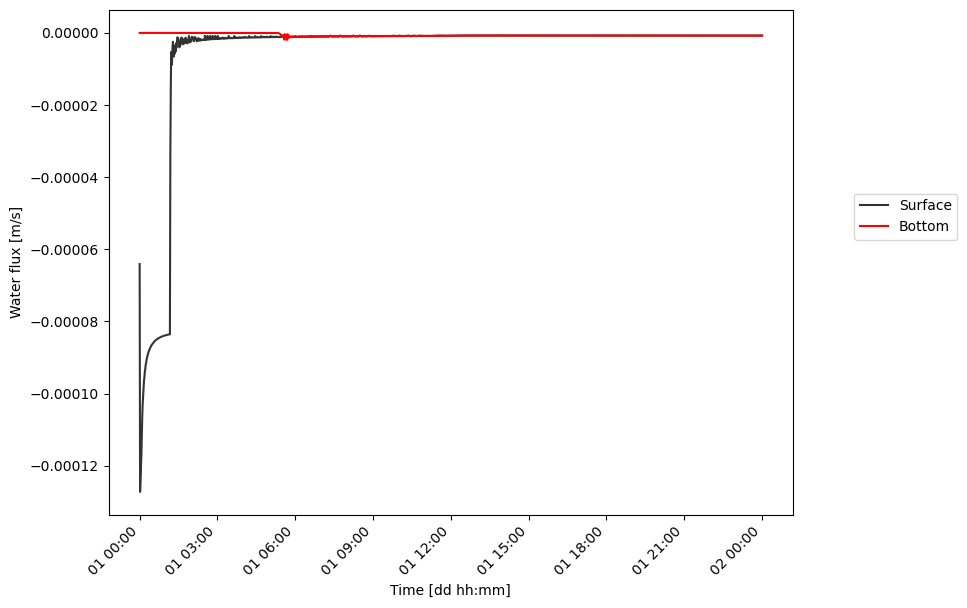

In [30]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

ds.darcyVelocity.sel(dualDepth=0, method='nearest').plot(ax=ax, label='Surface', color='0.2')
ds.darcyVelocity.sel(dualDepth=-2, method='nearest').plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Water flux [m/s]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()

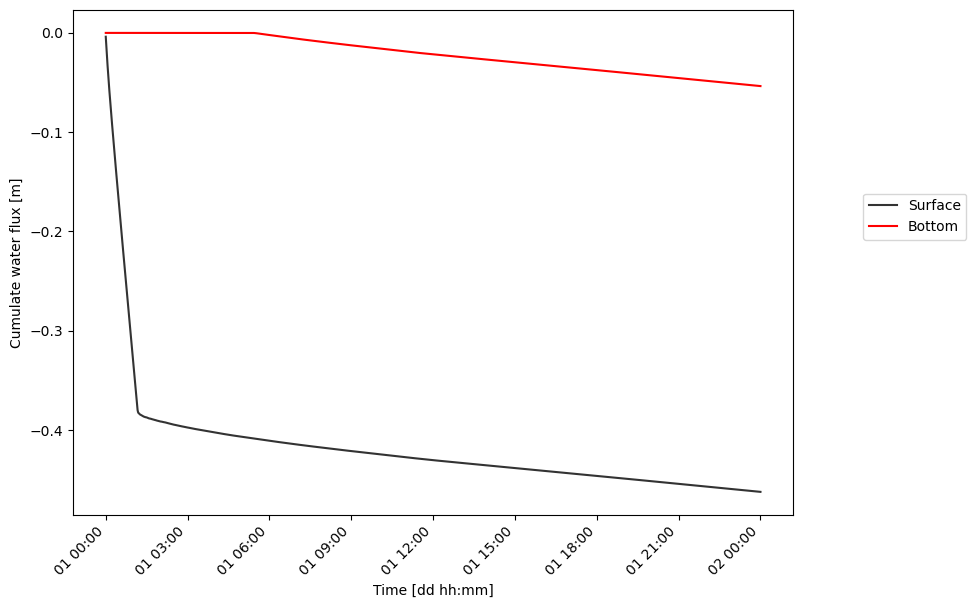

In [31]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

(ds.darcyVelocity.sel(dualDepth=0, method='nearest')*60).cumsum().plot(ax=ax, label='Surface', color='0.2')
(ds.darcyVelocity.sel(dualDepth=-2, method='nearest')*60).cumsum().plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Cumulate water flux [m]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()